In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_curve,mean_squared_error,confusion_matrix

In [4]:
#https://www.fao.org/worldfoodsituation/foodpricesindex/en/
df_food_index=pd.read_csv("food_price_index.csv")
df_food_index.rename(columns={'Date':'Date_Year_Month'},inplace=True)
print(df_food_index.columns)
print(df_food_index.head(3))

Index(['Date_Year_Month', 'Food Price Index', 'Meat', 'Dairy', 'Cereals',
       'Oils', 'Sugar'],
      dtype='object')
  Date_Year_Month  Food Price Index  Meat  Dairy  Cereals   Oils  Sugar
0         1990-01              64.1  73.4   53.5     64.1  44.59   87.9
1         1990-02              64.5  76.0   52.2     62.2  44.50   90.7
2         1990-03              63.8  77.8   41.4     61.3  45.75   95.1


In [5]:
print("The yahoo future prices for copper and oil\n")
df_copper=pd.read_csv("copper_prices.csv",parse_dates=["Date"]) 
df_copper["Open"]=df_copper["Open"].astype(float)*1000
df_copper["High"]=df_copper["High"].astype(float)*1000 
df_copper["Low"]=df_copper["Low"].astype(float) *1000
df_copper["Volume"]=df_copper["Volume"].astype(int)

df_copper.rename(columns={'Open':'Copper_Open','High':'Copper_High','Low':'Copper_Low','Volume':'Copper_Volume'},inplace=True)

def convert_date(date): 
    return str(date.year) + '-' + str(date.month)

df_copper.set_index("Date",inplace=True)
df_copper['Date_Year_Month']=df_copper.index.map(convert_date)


#print(df_copper["Date_Year_Month"].values)
df=pd.merge(df_copper,df_food_index,how="inner",on="Date_Year_Month")
print(df.head(3))


The yahoo future prices for copper and oil

   Copper_Open  Copper_High  Copper_Low  Copper_Volume Date_Year_Month  \
0       4303.5       4468.0      4129.0          16199         2021-12   
1       4354.5       4479.5      4205.5          65974         2021-11   
2       4150.0       4791.0      4142.0          11041         2021-10   

   Food Price Index   Meat  Dairy  Cereals   Oils  Sugar  
0             133.7  111.0  129.0    140.5  178.5  116.4  
1             135.3  112.5  126.0    141.4  184.6  120.2  
2             133.2  112.0  121.5    137.1  184.8  119.1  


In [6]:
df_oil=pd.read_csv("oil_wti_prices.csv",parse_dates=["Date_Year_Month"]) 
print(df_oil.columns)
df_oil["Oil_Open"]=df_oil["Oil_Open"].astype(float)
df_oil["Oil_High"]=df_oil["Oil_High"].astype(float) 
df_oil["Oil_Low"]=df_oil["Oil_Low"].astype(float) 
#df_oil["Oil_Volume"]=df_oil["Oil_Volume"].astype(int)

#def convert_date(date): 
#    return str(date.year) + '-' + str(date.month)

#df_oil.set_index("Date_Year_Month",inplace=True)
df_oil['Date_Year_Month']=df_oil['Date_Year_Month'].map(convert_date)
print(df_oil.head(3))

#print(df_copper["Date_Year_Month"].values)
df=pd.merge(df,df_oil,how="inner",on="Date_Year_Month")
print(df.head(3))



Index(['Date_Year_Month', 'Oil_Open', 'Oil_High', 'Oil_Low', 'Oil_Volume'], dtype='object')
  Date_Year_Month  Oil_Open  Oil_High  Oil_Low  Oil_Volume
0          2022-8     98.46     98.65    85.73     4459644
1          2022-7    106.01    111.45    90.56     6442224
2          2022-6    115.40    123.68   101.53     6646137
   Copper_Open  Copper_High  Copper_Low  Copper_Volume Date_Year_Month  \
0       4303.5       4468.0      4129.0          16199         2021-12   
1       4354.5       4479.5      4205.5          65974         2021-11   
2       4150.0       4791.0      4142.0          11041         2021-10   

   Food Price Index   Meat  Dairy  Cereals   Oils  Sugar  Oil_Open  Oil_High  \
0             133.7  111.0  129.0    140.5  178.5  116.4     67.01     77.44   
1             135.3  112.5  126.0    141.4  184.6  120.2     83.36     84.97   
2             133.2  112.0  121.5    137.1  184.8  119.1     75.12     85.41   

   Oil_Low  Oil_Volume  
0    62.43     7853281  
1   

In [7]:
#https://fred.stlouisfed.org/series/M1SL
df_money_supply=pd.read_csv("M1SL.csv",parse_dates=["Date_Year_Month"]) 
print(df_money_supply.columns)
df_money_supply["M1_MoneySupply"]=df_money_supply["M1_MoneySupply"].astype(float)

df_money_supply['Date_Year_Month']=df_money_supply['Date_Year_Month'].map(convert_date)
print(df_money_supply.head(3))

#print(df_copper["Date_Year_Month"].values)
df=pd.merge(df,df_money_supply,how="inner",on="Date_Year_Month")
print(df.head(3))


Index(['Date_Year_Month', 'M1_MoneySupply'], dtype='object')
  Date_Year_Month  M1_MoneySupply
0          1959-1           138.9
1          1959-2           139.4
2          1959-3           139.7
   Copper_Open  Copper_High  Copper_Low  Copper_Volume Date_Year_Month  \
0       4303.5       4468.0      4129.0          16199         2021-12   
1       4354.5       4479.5      4205.5          65974         2021-11   
2       4150.0       4791.0      4142.0          11041         2021-10   

   Food Price Index   Meat  Dairy  Cereals   Oils  Sugar  Oil_Open  Oil_High  \
0             133.7  111.0  129.0    140.5  178.5  116.4     67.01     77.44   
1             135.3  112.5  126.0    141.4  184.6  120.2     83.36     84.97   
2             133.2  112.0  121.5    137.1  184.8  119.1     75.12     85.41   

   Oil_Low  Oil_Volume  M1_MoneySupply  
0    62.43     7853281         20430.7  
1    64.43    10364108         20279.9  
2    74.23     9725158         20063.5  


In [8]:
#https://fred.stlouisfed.org/series/CPIAUCSL
df_inflation=pd.read_csv('CPIAUCSL.csv',parse_dates=['Date'])

df_inflation['Date_Year_Month']=df_inflation['Date'].map(convert_date)
df_inflation=df_inflation.drop(columns=['Date'])
df=pd.merge(df,df_inflation,how="inner",on="Date_Year_Month")
print(df.head(3))


   Copper_Open  Copper_High  Copper_Low  Copper_Volume Date_Year_Month  \
0       4303.5       4468.0      4129.0          16199         2021-12   
1       4354.5       4479.5      4205.5          65974         2021-11   
2       4150.0       4791.0      4142.0          11041         2021-10   

   Food Price Index   Meat  Dairy  Cereals   Oils  Sugar  Oil_Open  Oil_High  \
0             133.7  111.0  129.0    140.5  178.5  116.4     67.01     77.44   
1             135.3  112.5  126.0    141.4  184.6  120.2     83.36     84.97   
2             133.2  112.0  121.5    137.1  184.8  119.1     75.12     85.41   

   Oil_Low  Oil_Volume  M1_MoneySupply  CPIAUCSL  
0    62.43     7853281         20430.7   280.126  
1    64.43    10364108         20279.9   278.524  
2    74.23     9725158         20063.5   276.590  


In [9]:
df.set_index("Date_Year_Month",inplace=True)
df.sort_values(by="Date_Year_Month",inplace=True)
print(df.index)


Index(['2017-11', '2017-12', '2018-10', '2018-11', '2018-12', '2019-10',
       '2019-11', '2020-10', '2020-12', '2021-10', '2021-11', '2021-12'],
      dtype='object', name='Date_Year_Month')


In [10]:
def accumulate(df,investment,fieldName,accumName):
    first_date=df.index.min()    
    print("first date",first_date)
    shares=float(investment)/float(df[df.index==first_date][fieldName])
    print("Initial Share count",shares)
    df[accumName] = (df[[fieldName]].pct_change()+1).cumprod()
    df[accumName]=df[accumName].astype(float)
    df[accumName]=df[accumName].mul(investment)
    df[accumName]=df[accumName].fillna(0)
    df[fieldName+'_Pct_Change']=df[fieldName].pct_change()

investment=1000
accumulate(df,investment,"Copper_Open","Copper_Accum")
accumulate(df,investment,"Oil_Open","Oil_WTI_Accum")
accumulate(df,investment,"Meat","Meat_Accum")
accumulate(df,investment,"Sugar","Sugar_Accum")
accumulate(df,investment,"Oils","Oils_Accum")
accumulate(df,investment,"Cereals","Cereals_Accum")
accumulate(df,investment,"Dairy","Dairy_Accum")
accumulate(df,investment,"M1_MoneySupply","M1_MoneySupply_Accum")
print(df[['Sugar_Accum','Sugar']].head(10))

first date 2017-11
Initial Share count 0.3186743148502231
first date 2017-11
Initial Share count 18.298261665141812
first date 2017-11
Initial Share count 10.16260162601626
first date 2017-11
Initial Share count 10.787486515641856
first date 2017-11
Initial Share count 9.629272989889264
first date 2017-11
Initial Share count 10.857763300760045
first date 2017-11
Initial Share count 8.976660682226212
first date 2017-11
Initial Share count 0.27540622418066646
                 Sugar_Accum  Sugar
Date_Year_Month                    
2017-11             0.000000   92.7
2017-12           960.086300   89.0
2018-10           825.242718   76.5
2018-11           861.920173   79.9
2018-12           844.660194   78.3
2019-10           839.266451   77.8
2019-11           854.368932   79.2
2020-10           913.700108   84.7
2020-12           939.590076   87.1
2021-10          1284.789644  119.1


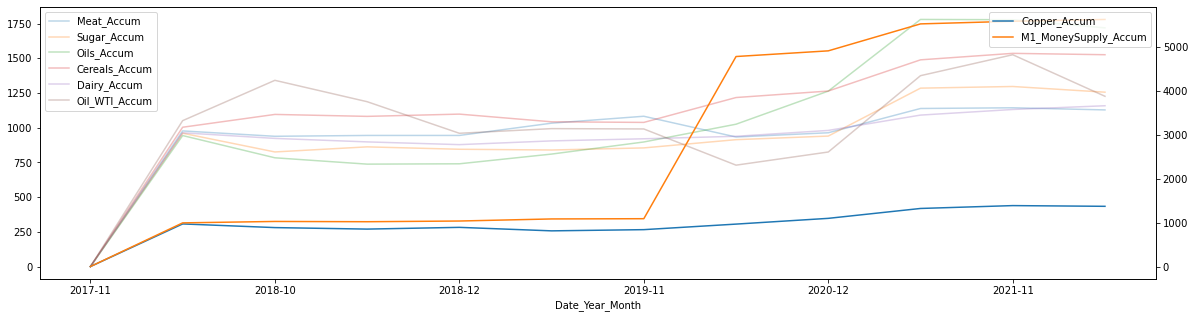

In [11]:

fig,ax=plt.subplots(figsize=(20, 5)) 

df[['Meat_Accum','Sugar_Accum','Oils_Accum','Cereals_Accum','Dairy_Accum','Oil_WTI_Accum']].plot(alpha=0.3,ax=ax)
twinx=plt.twinx()
df[['Copper_Accum','M1_MoneySupply_Accum']].plot(ax=twinx,label="Copper & M1 Money")
plt.legend(loc='upper right')
plt.show()


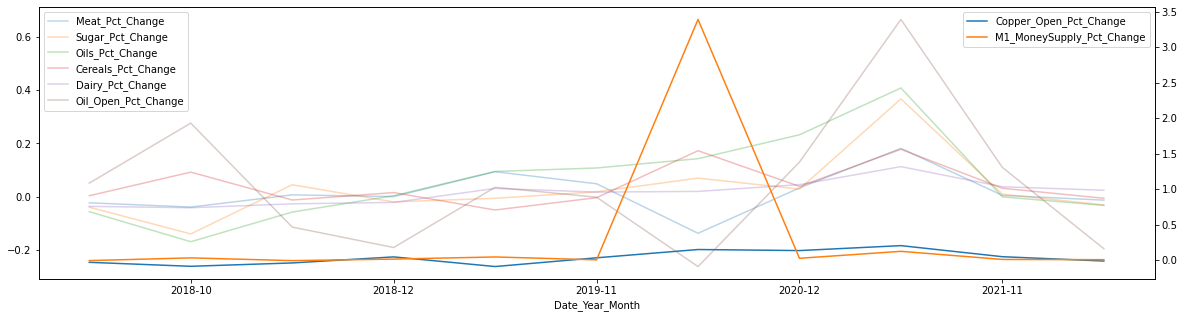

In [12]:
fig,ax=plt.subplots(figsize=(20, 5)) 

df[['Meat_Pct_Change','Sugar_Pct_Change','Oils_Pct_Change','Cereals_Pct_Change','Dairy_Pct_Change','Oil_Open_Pct_Change']].plot(alpha=0.3,ax=ax)
plt.legend(loc='upper left')
twinx=plt.twinx()
df[['Copper_Open_Pct_Change','M1_MoneySupply_Pct_Change']].plot(ax=twinx,label="Copper & M1 Money")
plt.legend(loc='upper right')
plt.show()

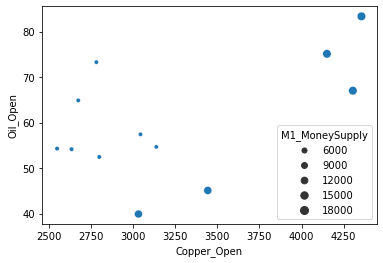

M1 money affected copper more than oil


In [13]:
sns.scatterplot(x="Copper_Open",y="Oil_Open", data=df,size="M1_MoneySupply")
plt.show()

print("M1 money affected copper more than oil")

Date range 2017-11 thru 2021-12


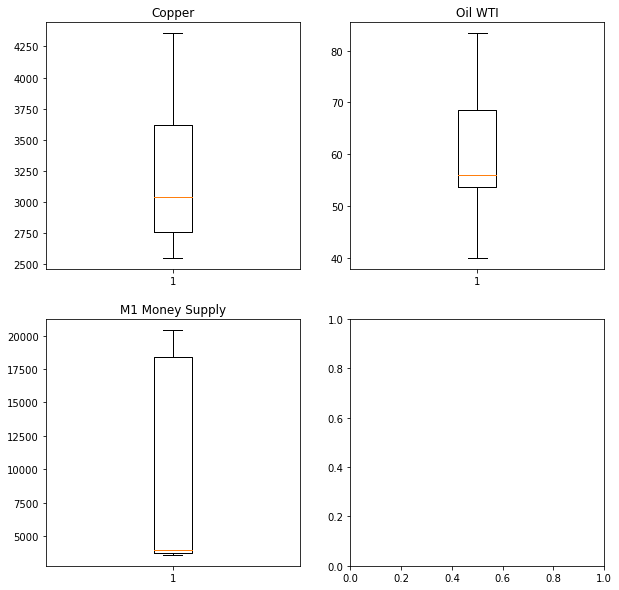

the median for copper and oil and money supply is low suggest a shock occurred pushing the high range in an accelerated manner recently


In [14]:
fig,ax=plt.subplots(2,2, figsize=(10,10))

print("Date range {0} thru {1}".format(df.index.min(),df.index.max()))

ax[0,0].boxplot(df['Copper_Open'])  
ax[0,0].set_title("Copper")
#plt.show()
ax[0,1].boxplot(df['Oil_Open'])  
ax[0,1].set_title("Oil WTI")
ax[1,0].boxplot(df['M1_MoneySupply'])    
ax[1,0].set_title("M1 Money Supply")
plt.show()

print("the median for copper and oil and money supply is low suggest a shock occurred pushing the high range in an accelerated manner recently")

In [15]:
features=["Oil_WTI_Accum","Meat_Accum","Sugar_Accum","Oils_Accum","Cereals_Accum","Dairy_Accum","M1_MoneySupply_Accum"]
X=df[features]
y=df["Copper_Accum"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [16]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=200, subsample=0.45, learning_rate=0.2, seed=123)

xg_reg.fit(X_train, y_train)

y_pred= xg_reg.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print("RMSE: %f" %(rmse))

[14:02:14] WARNING: d:\bld\xgboost-split_1660208973102\work\src\objective\regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 161.381733


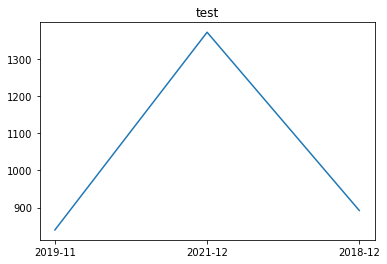

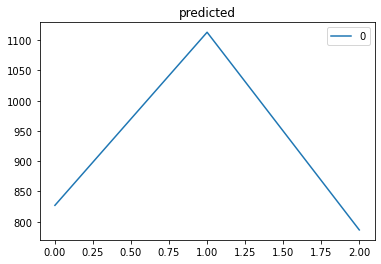

In [17]:
plt.plot(y_test)
plt.title("test")
pd.DataFrame(y_pred).plot()
plt.title("predicted")
plt.show()

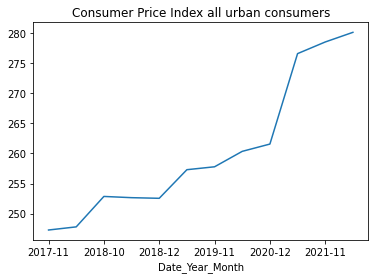

In [18]:
df["CPIAUCSL"].plot()
plt.title("Consumer Price Index all urban consumers")
plt.show()

247.284 280.126
6.568399999999997
[247.284, 253.8524, 260.4208, 266.9892, 273.5576, 280.126, 286.6944, 293.26279999999997, 299.83119999999997, 306.39959999999996]
cpi is skewed right


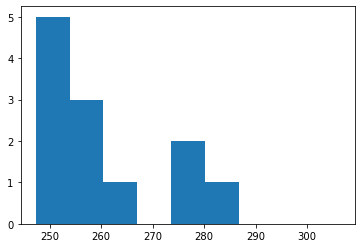

In [24]:
minval=df["CPIAUCSL"].min()
maxval=df['CPIAUCSL'].max()
print(minval,maxval)

interval=(maxval-minval)/5
print(interval)

ranges=[]
for i in range(10):
    ranges.append(minval+i*interval)
    
print(ranges)

plt.hist(df["CPIAUCSL"], bins=ranges)
print("cpi is skewed right")

In [1]:
print("done")

done
